In [0]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

In [0]:
def plot_images(img1, img2, title1='', title2=''):
  fig = plt.figure(figsize=[15,15])
  ax1 = fig.add_subplot(121)
  ax1.imshow(img1, cmap='gray')
  ax1.set(xticks=[], yticks=[], title=title1)
  ax2 = fig.add_subplot(122)
  ax2.imshow(img2, cmap='gray')
  ax2.set(xticks=[], yticks=[], title=title2)

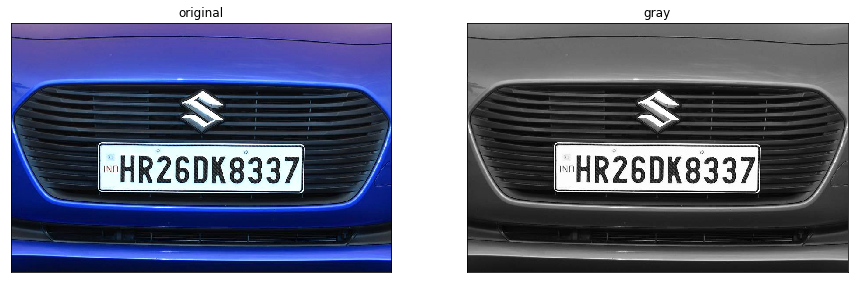

In [38]:
originalimg = cv2.imread('car1.jpg')
grayimg = cv2.cvtColor(originalimg, cv2.COLOR_BGR2GRAY)
plot_images(originalimg, grayimg,'original','gray')

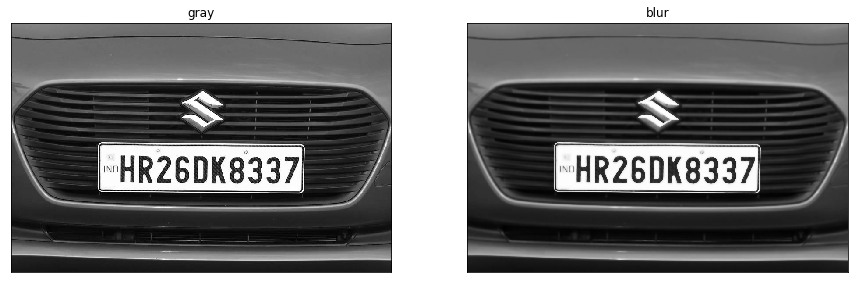

In [52]:
blurimg = cv2.bilateralFilter(grayimg, 6, 90, 90)
plot_images(grayimg, blurimg, 'gray', 'blur')

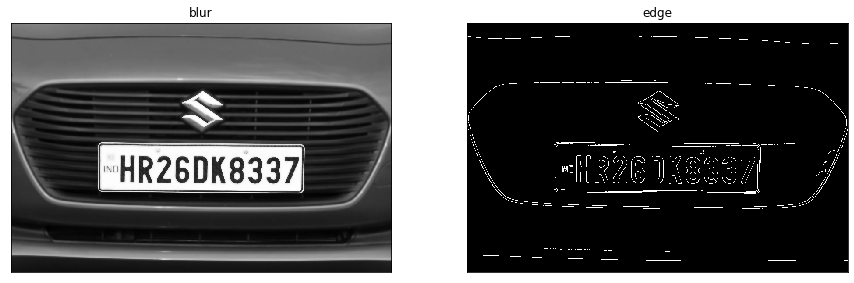

In [53]:
edgeimg = cv2.Canny(blurimg, 30, 200)
plot_images(blurimg, edgeimg,'blur','edge')

In [0]:
conts, new = cv2.findContours(edgeimg.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
originalimgcpy = originalimg.copy()

In [0]:
_ = cv2.drawContours(originalimgcpy, conts, -1, (255,0,0), 2)

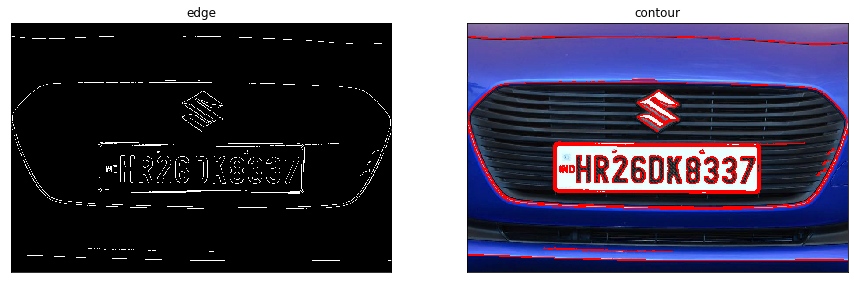

In [69]:
plot_images(edgeimg, originalimgcpy, 'edge', 'contour')

In [0]:
reducedconts = sorted(conts, key=cv2.contourArea, reverse=True)[:5]

In [0]:
reducedcontimg = originalimg.copy()
_ = cv2.drawContours(reducedcontimg, reducedconts, -1, (255,0,0), 2)

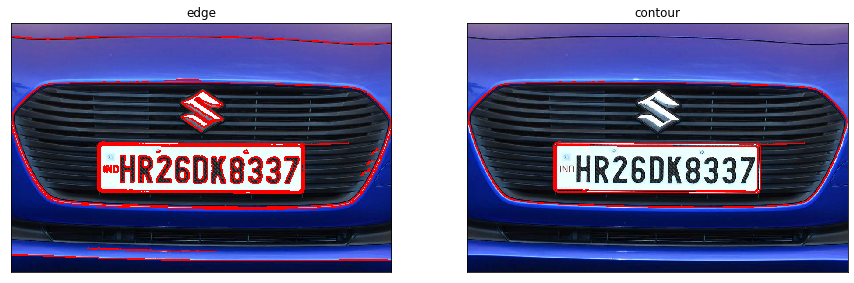

In [81]:
plot_images(originalimgcpy, reducedcontimg, 'edge', 'contour')

In [101]:
plate = None
for c in reducedconts:
  perimeter = cv2.arcLength(c, True)
  edge_count = cv2.approxPolyDP(c, 0.02*perimeter, True)
  if len(edge_count) == 4:
    x, y, w, h = cv2.boundingRect(c)
    plate = originalimg[y:y+h, x:x+w]
    break
  
cv2.imwrite('plate.jpg', plate)

True

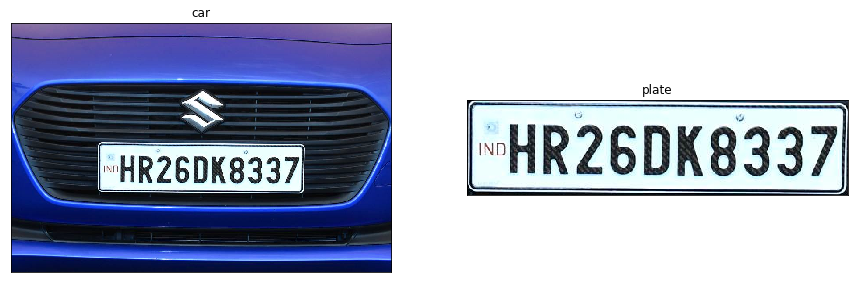

In [102]:
plot_images(originalimg, plate, 'car', 'plate')

In [116]:
import pytesseract
import re
text = pytesseract.image_to_string(plate, lang='eng')
text = re.sub(r'\W+', '', text)
print(text)

HR26DK8337


###Prerequisites for pytesseract.image_to_string()

In [108]:
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 7 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 2s (3,018 kB/s)
debconf: unable to initia

In [109]:
!pip install pytesseract